In [1]:
## have 70,000 images
## we train on the 6000 images due to have cpu

In [2]:
## ANN Archi
# input layer --> 128 ne --> 64 ne --> 10 ne(output)
#                 relu        relu      softmax



In [1]:
import numpy as np

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
# Set the random seeds for reproducibility
torch.manual_seed(42)

In [5]:
df = pd.read_csv('Fashion/fmnist_small.csv')

In [6]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


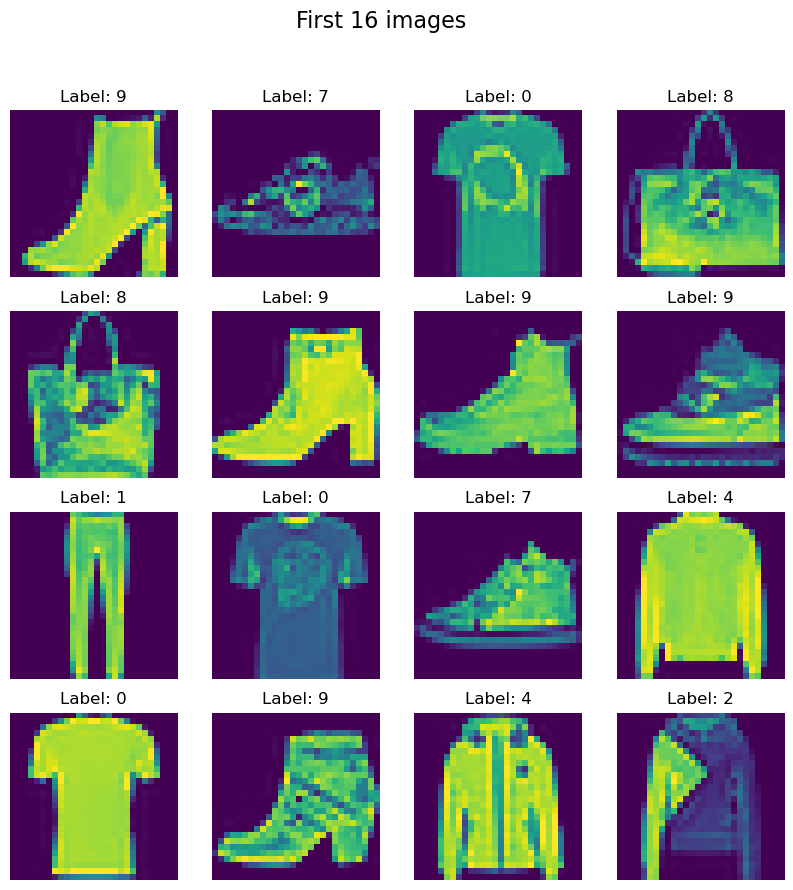

In [7]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images ",fontsize=16)

for i ,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i,0]}")

In [8]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
## Scaling featurs
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
# Create the custome class
class CustomeDataset(Dataset):
    def __init__(self,featurs,lables):
        self.featurs = torch.tensor(featurs,dtype=torch.float32)
        self.lable = torch.tensor(lables,dtype=torch.long)

    def __len__(self):
        return len(self.featurs)
    
    def __getitem__(self, index):
        return self.featurs[index],self.lable[index]

In [12]:
# Create the train dataset object
train_dataset = CustomeDataset(x_train,y_train)

In [13]:
len(train_dataset)

4800

In [14]:
# Create the test dataset object
test_dataset = CustomeDataset(x_test,y_test)
len(test_dataset)

1200

In [15]:
# Create the Train and test loader

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [16]:
# Define NN class
class MyNN(nn.Module):
    def __init__(self,num_featurs):
        super().__init__()  
        self.model = nn.Sequential(
            nn.Linear(num_featurs,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        return self.model(x)
    

In [17]:
# set learning and epochs
epochs = 50
learning_rate =0.1


In [18]:
# Instatiate the model
model = MyNN(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)


In [19]:
# Training Loop
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_featurs , batch_lables in train_loader:
        # forward pass
        y_pred = model.forward(batch_featurs)

        # loss calculate
        loss = criterion(y_pred,batch_lables)

        # Backprop
        optimizer.zero_grad()
        loss.backward()

        # Update the gradients
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch +1 } Loss : {avg_loss}")

Epoch : 1 Loss : 1.321636850833893
Epoch : 2 Loss : 0.7793365486462911
Epoch : 3 Loss : 0.6427524626255036
Epoch : 4 Loss : 0.5751657505830129
Epoch : 5 Loss : 0.5281801937023799
Epoch : 6 Loss : 0.4952874955534935
Epoch : 7 Loss : 0.4602432981133461
Epoch : 8 Loss : 0.43594589665532113
Epoch : 9 Loss : 0.41829214711984
Epoch : 10 Loss : 0.3976178215940793
Epoch : 11 Loss : 0.3859447174270948
Epoch : 12 Loss : 0.3714284941057364
Epoch : 13 Loss : 0.34849797944227856
Epoch : 14 Loss : 0.34953822041551275
Epoch : 15 Loss : 0.3174830993016561
Epoch : 16 Loss : 0.30957285126050316
Epoch : 17 Loss : 0.2964126534759998
Epoch : 18 Loss : 0.28544201801220576
Epoch : 19 Loss : 0.27287159097691377
Epoch : 20 Loss : 0.26364209145307543
Epoch : 21 Loss : 0.27335520724455514
Epoch : 22 Loss : 0.2426882132391135
Epoch : 23 Loss : 0.24097084249059358
Epoch : 24 Loss : 0.22358022779226303
Epoch : 25 Loss : 0.22390356036523978
Epoch : 26 Loss : 0.2096334281563759
Epoch : 27 Loss : 0.21853055037558078
E

In [20]:
# Set the model to eval model
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [23]:
# Evaulation code 
total = 0
correct = 0

with torch.no_grad():
    for batch_featurs,batch_lables in test_loader:
        output = model(batch_featurs)
        _,predicted = torch.max(output,1)

        total = total + batch_lables.shape[0]
        correct = correct + (predicted == batch_lables).sum().item()

    print(correct/total)
    


0.8408333333333333


In [ ]:
# Improve accuracy

# Use the whole dataset
# optimizers
# learning rate
# epochs
# weights init
# regularization
# dropoput
# batch norm

# model architecutre
